<a href="https://colab.research.google.com/github/EdwardTong899/Master_Thesis-Shuffle_AES/blob/main/plot_AES_powertrace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This program is for plot the  powertrace, the input is form PTPX simulation the ASIC design power, we use linear relation to link the point to point.

In [36]:
f=open('powerTrace2.out', mode='r')
f_list=f.readlines()



In [37]:
def scientific_to_float(scientific_string):
    # 使用正規表達式提取數字和指數部分
    import re
    match = re.match(r'^([+-]?\d+(?:\.\d*)?)(?:[eE]([+-]?\d+))?$', scientific_string)
    if match:
        # 如果匹配成功，提取數字和指數
        number = float(match.group(1))
        exponent = int(match.group(2)) if match.group(2) else 0
        # 將數字和指數結合成浮點數
        return number * 10**exponent
    else:
        # 如果匹配失敗，返回 None
        return None

In [38]:
nb_list=[]
i = 0
while i < len(f_list):
  temp = f_list[i]
  if(str.isdigit(temp[0]) == 1):
    templist=[]
    templist.append(int(temp))
    i = i + 1
    temp = f_list[i]
    char_nb=""
    for j in range(3,12):
      char_nb += temp[j]
    templist.append(scientific_to_float(char_nb))
    nb_list.append(templist)
  i = i + 1


In [39]:
first_n=0
now_value=nb_list[0]

powertrace=[]
powertrace.clear()
powertrace.append(nb_list[0][1])
for i in range(1,len(nb_list)):
# for i in range(1,3):
  next_value=nb_list[i]
  step=abs(now_value[0]-next_value[0])+1
  diff=now_value[1]-next_value[1]
  gap=diff/step
  for j in range(now_value[0]+1,next_value[0]):
    powertrace.append(now_value[1]-gap)
    gap +=diff/step
  now_value = next_value
  # print(next_value)
  powertrace.append(now_value[1])
# print(powertrace[18791])

1678644


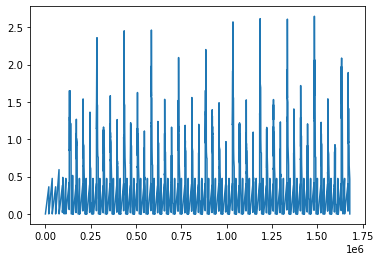

In [ ]:
print(len(powertrace))
import matplotlib.pyplot as plt
plt.plot(powertrace)
plt.show()